In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_dir = 'data/cifar10'
batch_size = 128

In [27]:
train_transform = transforms.Compose([
    # 4 pixels are padded on each side, 
    transforms.Pad(4),
    # a 32×32 crop is randomly sampled from the 
    # padded image or its horizontal flip.
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(32),
    transforms.ToTensor()
]);
data_transform = transforms.Compose([ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
test_transform = transforms.Compose([
    # For testing, we only evaluate the single 
    # view of the original 32×32 image.
    transforms.ToTensor()
])

train_loader =  DataLoader(CIFAR10(download=True, root=".", transform=train_transform, train=True), batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(CIFAR10(download=False, root=".", transform=test_transform, train=False), batch_size=batch_size, shuffle=False)
# Training images
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)




Files already downloaded and verified
torch.Size([128, 3, 32, 32])


In [32]:
X = images.numpy().transpose([0, 2, 3, 1])

In [33]:
X.shape

(128, 32, 32, 3)

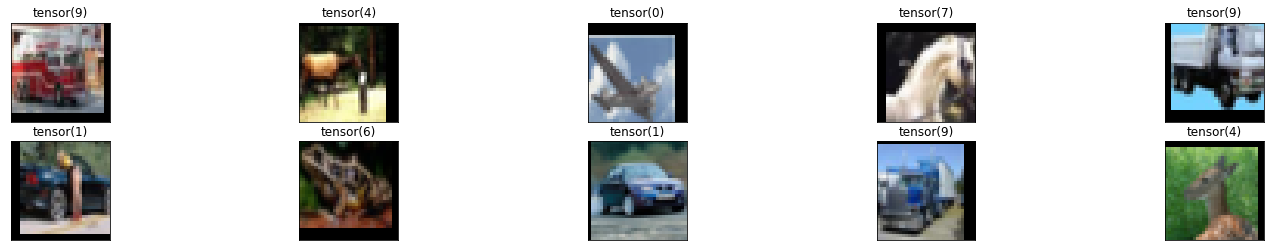

In [29]:
to_pil = transforms.ToPILImage()
img = to_pil(images[1])
fig = plt.figure(figsize=(25,4))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    plt.imshow(to_pil(images[idx]))
    ax.set_title(labels[idx])

In [6]:
train_transform = transforms.Compose([
    # 4 pixels are padded on each side, 
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    # For testing, we only evaluate the single 
    # view of the original 32×32 image.
    transforms.ToTensor()
])

train_loader, test_loader = get_data_loaders(data_dir,
                                             batch_size,
                                             train_transform,
                                             test_transform,
                                             shuffle=True,
                                             num_workers=4,
                                             pin_memory=True)


# Takes a while to run so I've hardcoded results below

means, stds = calculate_normalisation_params(train_loader, test_loader)
print(f'means: {means}')
print(f'stds: {stds}')

NameError: name 'get_data_loaders' is not defined